# Olist E‑commerce: End‑to‑End Business Analysis
**By:** Aarohi Mistry  
**GitHub:** [AarohiAnalyzes/olist-ecommerce-analysis](https://github.com/AarohiAnalyzes/olist-ecommerce-analysis)  
**Dataset:** Brazilian E‑Commerce by Olist (Kaggle)

## Project Overview
Comprehensive analysis of Brazilian e-commerce data covering three business domains.

## Project Objectives
1. **Sales Performance** – Monthly revenue trends (2017‑2018)  
2. **Customer Geographic Analysis** – Regional distribution  
3. **Product & Seller Performance** – Category insights, seller efficiency


---
## **Question 1: Sales Performance Analysis**
**Business Question:** What was the monthly revenue for delivered orders in 2017 and 2018?

**Analysis Plan:**
1. Load orders and `order_items` data  
2. Join tables on `order_id`  
3. Filter for delivered orders  
4. Calculate revenue (`price` – no quantity column)  
5. Extract year‑month from timestamp  
6. Aggregate monthly revenue  
7. Visualize trend
---

## 1.0 Initial Setup for the Project

In [209]:
# Import Libraries for data analysis and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All the libraries imported successfully...")

All the libraries imported successfully...


In [210]:
# Load the datasets
order_items_df = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
order_df = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")

print("Datasets are loaded...")

Datasets are loaded...


In [211]:
order_items_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [212]:
order_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


* From `order_items_df` -> Select `order_id`, `price`
* From `order_df` -> Select `order_id`, `order_purchase_timestamp`, `order_status`


In [213]:
# selecting required columns from both the dfs using .loc function
order_new = order_df.loc[:,['order_id', 'order_purchase_timestamp', 'order_status']]
order_new.columns

Index(['order_id', 'order_purchase_timestamp', 'order_status'], dtype='object')

In [214]:
order_items_new = order_items_df.loc[:,['order_id', 'price']]
order_items_new.columns

Index(['order_id', 'price'], dtype='object')

### 1.1 `order` VS. `order_items` analysis

In [215]:
# Basic Shape Information
print("Orders shape:", order_new.shape)
print("Order items shape:", order_items_new.shape)

print("-------------------------------")

# Average Order items per order
avg_item_per_order = order_items_new.shape[0] / order_new.shape[0]
print(f"Average items per order: {avg_item_per_order:.2f}")

# Check for order uniqueness
unique_orders = order_new['order_id'].nunique()
duplicate_orders = order_new.shape[0] - unique_orders

print("-------------------------------")

print("Number of unique orders:",unique_orders)
print("Number of duplicate orders:",duplicate_orders)

print("-------------------------------")

# Check how many orders have items
order_with_items = order_items_new['order_id'].nunique()
order_without_items = order_new.shape[0] - order_with_items
print("Number of orders with items:", order_with_items)
print("Number of orders without items:", order_without_items)

print("-------------------------------")

# Item distribution per order (Using Groupby)

items_per_order = order_items_new.groupby('order_id').size()
print("Minimum number of items per order:",items_per_order.min())
print("Maximum number of items per order:",items_per_order.max())

print("-------------------------------")

print("Sample Data for Orders")
print(order_new.sample(3))
print("\n")
print("Sample Data for Order Items")
print(order_items_new.sample(3))

Orders shape: (99441, 3)
Order items shape: (112650, 2)
-------------------------------
Average items per order: 1.13
-------------------------------
Number of unique orders: 99441
Number of duplicate orders: 0
-------------------------------
Number of orders with items: 98666
Number of orders without items: 775
-------------------------------
Minimum number of items per order: 1
Maximum number of items per order: 21
-------------------------------
Sample Data for Orders
                               order_id order_purchase_timestamp order_status
2112   9044b4ff307597019884db48921c1e7e      2018-03-08 16:07:39    delivered
68043  cd623324c25a5749845117a6d628b994      2018-02-01 12:03:13    delivered
25441  0b6d11d4a289a1574e8888f2558dd548      2017-01-26 16:03:15    delivered


Sample Data for Order Items
                                order_id   price
46929   6aaac39c745e3f8bc6391b775041cd93  116.99
78419   b26e3810d22f6c580f65bba31809c43a  317.00
108777  f7352ff5cad83aaa79b315995aa

#### 1.1 Summary: Orders vs. Order Items
- **Total orders:** 99,441 | **Total items:** 112,650  
- **Avg items per order:** 1.13 → *Single‑item marketplace*  
- **Orders without items:** 775 (0.78%) – *failed/cancelled orders*  
- **Bulk purchases:** up to 21 items in one order → *B2B potential*  
- **Data quality:** No duplicate order IDs

**Business decision:** Exclude the 775 orders without items from revenue analysis.

## 1.2 Date Range Analysis

In [216]:
order_new.columns

Index(['order_id', 'order_purchase_timestamp', 'order_status'], dtype='object')

In [217]:
order_items_new.columns

Index(['order_id', 'price'], dtype='object')

In [218]:
# Convert datatype from 'object' to 'datetime'
order_new['order_purchase_timestamp'] = pd.to_datetime(order_new['order_purchase_timestamp'], errors="coerce")
print(order_new['order_purchase_timestamp'].dtype)

datetime64[ns]


In [219]:
# Count of missing values in the 'order_purchase_timestamp' column
order_new["order_purchase_timestamp"].isnull().sum()

np.int64(0)

In [220]:
# Min Date
order_new['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [221]:
# Max Date
order_new['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [222]:
order_new.head()

,order_id,order_purchase_timestamp,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,delivered


In [223]:
# Create a new column "year_month" and extract year and month as a string "YYYY-MM"
order_new['year_month'] = order_new["order_purchase_timestamp"].dt.strftime('%Y-%m')
order_new.head()

,order_id,order_purchase_timestamp,order_status,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,delivered,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,delivered,2018-02


In [224]:
# Sort the values according to date and time
order_new = order_new.sort_values('order_purchase_timestamp').reset_index(drop=True)
order_new.head()

,order_id,order_purchase_timestamp,order_status,year_month
0,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04 21:15:19,shipped,2016-09
1,e5fa5a7210941f7d56d0208e4e071d35,2016-09-05 00:15:34,canceled,2016-09
2,809a282bbd5dbcabb6f2f724fca862ec,2016-09-13 15:24:19,canceled,2016-09
3,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,delivered,2016-09
4,71303d7e93b399f5bcd537d124c0bcfa,2016-10-02 22:07:52,canceled,2016-10


In [225]:
# Monthly order counts
order_new.groupby('year_month').size()

year_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
dtype: int64

In [226]:
# Minimum monthly order counts
print(order_new.groupby('year_month').size().min())
print(order_new.groupby('year_month').size().idxmin())

1
2016-12


In [227]:
# Maximum monthly Order counts
print(order_new.groupby('year_month').size().max())
print(order_new.groupby('year_month').size().idxmax())

7544
2017-11


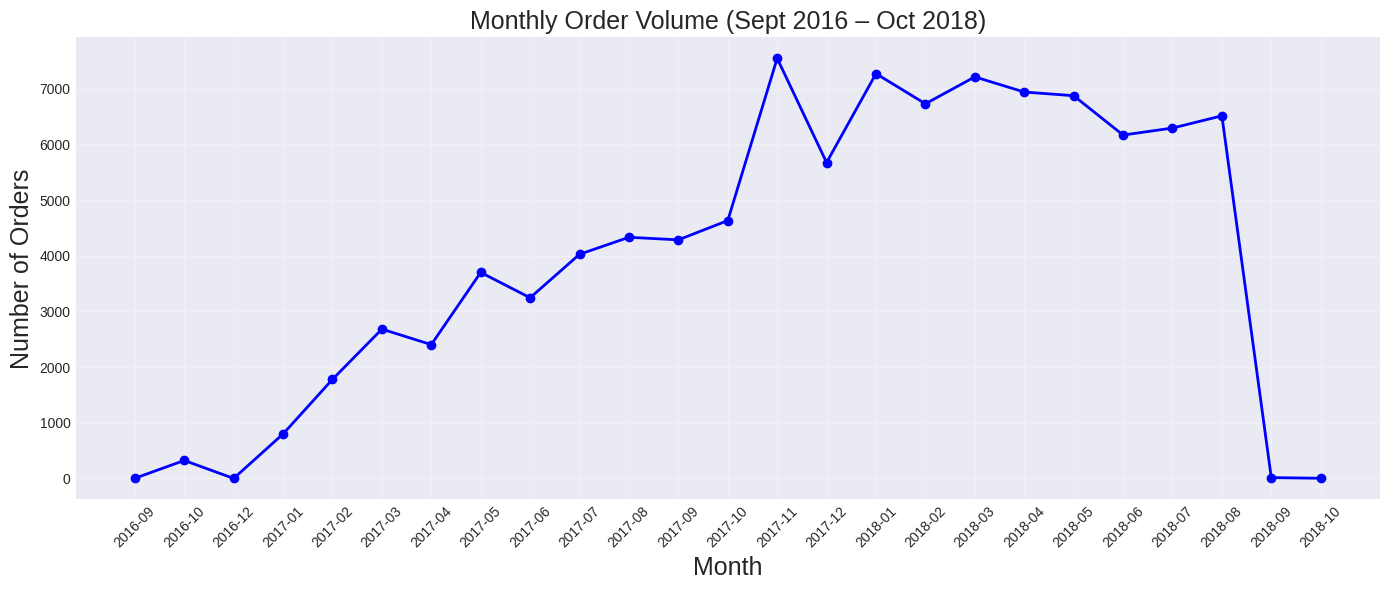

In [228]:
# Visualization for montly orders
import matplotlib.pyplot as plt

monthly_orders = order_new.groupby('year_month').size()

plt.figure(figsize=(14,6))
monthly_orders.plot(kind='line', marker='o', linewidth=2, color = 'Blue')
plt.title('Monthly Order Volume (Sept 2016 – Oct 2018)', fontsize=18)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Number of Orders', fontsize = 18)
plt.xticks(range(len(monthly_orders)), monthly_orders.index, rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [229]:
order_new['year'] = order_new['order_purchase_timestamp'].dt.strftime('%Y')
order_new['month'] = order_new['order_purchase_timestamp'].dt.strftime('%m')
order_new.head()

,order_id,order_purchase_timestamp,order_status,year_month,year,month
0,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04 21:15:19,shipped,2016-09,2016,09
1,e5fa5a7210941f7d56d0208e4e071d35,2016-09-05 00:15:34,canceled,2016-09,2016,09
2,809a282bbd5dbcabb6f2f724fca862ec,2016-09-13 15:24:19,canceled,2016-09,2016,09
3,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,delivered,2016-09,2016,09
4,71303d7e93b399f5bcd537d124c0bcfa,2016-10-02 22:07:52,canceled,2016-10,2016,10


In [230]:
year_grpby = order_new.groupby('year').size()
print(year_grpby)

year
2016      329
2017    45101
2018    54011
dtype: int64


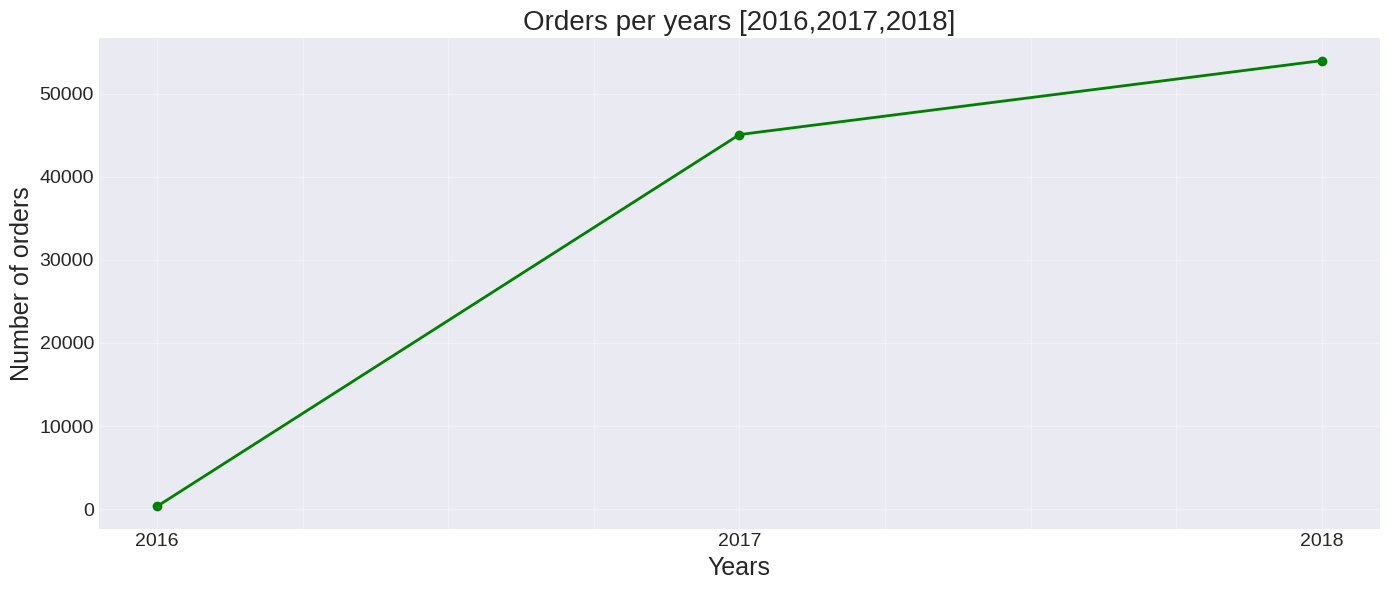

In [231]:
# Line chart showing the number of orders in the given three years

plt.figure(figsize = (14,6))
year_grpby.plot(kind='line', marker = 'o', linewidth = 2, color = 'green')

plt.title("Orders per years [2016,2017,2018]", fontsize = 20)
plt.xlabel("Years", fontsize = 18)
plt.ylabel("Number of orders", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

#### 1.2 Date Range Summary

- **Time coverage:** 2016-09-04 to 2018-10-17 (≈25 months).
- **Missing timestamps:** 0 – clean data.
- **Monthly order trend:**  
  - Orders grow steadily from early 2017, peak in **November 2017** (7,544 orders).  
  - Sharp drop in December 2017, then recovery in 2018.  
  - Data for **Sept–Dec 2016** and **Sept–Oct 2018** are sparse – these months will be excluded from full-year analysis.

**Decision:** For revenue analysis, I will **filter to full calendar years 2017 and 2018** only, to ensure fair month-to-month comparison.

## 1.3 Order Status Distrubution

In [232]:
order_new.columns

Index(['order_id', 'order_purchase_timestamp', 'order_status', 'year_month',
       'year', 'month'],
      dtype='object')

In [233]:
# Frequency Counts
order_status_counts = order_new['order_status'].value_counts()
print(order_new['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [234]:
# Convert the counts into percentage
print(round(order_new['order_status'].value_counts(normalize = True)*100,2))

order_status
delivered      97.02
shipped         1.11
canceled        0.63
unavailable     0.61
invoiced        0.32
processing      0.30
created         0.01
approved        0.00
Name: proportion, dtype: float64


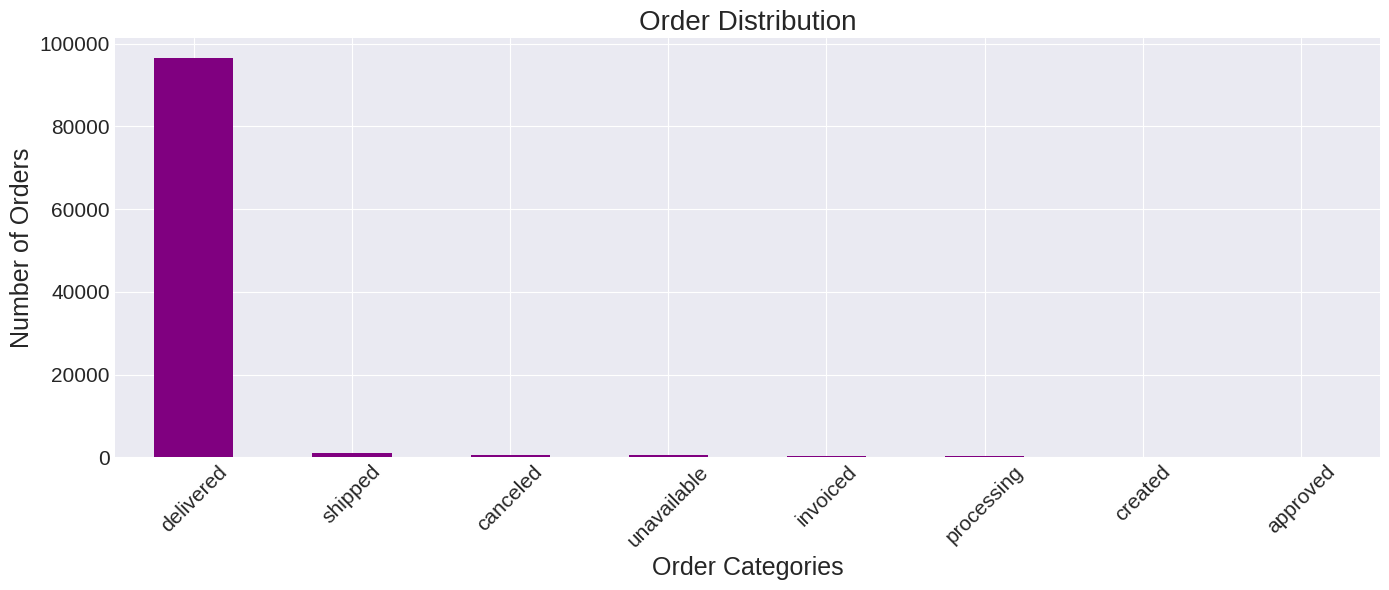

In [235]:
# Bar chart to see the distribution of the orders
plt.figure(figsize = (14,6))
order_status_counts.plot(kind="bar", color = 'purple')
plt.title("Order Distribution", fontsize = 20)
plt.xlabel("Order Categories", fontsize = 18)
plt.ylabel("Number of Orders", fontsize = 18)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

#### 1.3 Summary: Order Status Distribution

- **Delivered orders:** 96,478 (97.02% of orders with items)  
- **Shipped orders:** 1,107 (1.11%)
- **Canceled:** 625 (0.63%)  
- **Unavailable:** 609 (0.61%)  
- **Other statuses (invoiced, processing, created, approved):** < 0.7% combined  
- **Data quality:** No unexpected statuses; `delivered` is overwhelmingly dominant.

**Business decision:**  
Only **`delivered`** orders will be included in revenue calculation.  
All other statuses represent orders that either failed, were cancelled, or are not yet complete – they do not reflect actual earned revenue and will be **excluded** from the sales analysis.

## 1.4 Missing Values Analysis

In [236]:
print("Missing Values in the 'Order' table")
print(order_new.isnull().sum())
print("\n")
print("Missing Values in the 'Order_items' table")
print(order_items_new.isnull().sum())

Missing Values in the 'Order' table
order_id                    0
order_purchase_timestamp    0
order_status                0
year_month                  0
year                        0
month                       0
dtype: int64


Missing Values in the 'Order_items' table
order_id    0
price       0
dtype: int64


#### 1.4 Summary: Missing Values Analysis

- **`order_new`:** 0 missing in all columns   
- **`order_items_new`:** 0 missing in `order_id` and `price`  
- **Critical columns:** `order_purchase_timestamp`, `order_status`, `price` – all complete.

**Decision:** No missing data to handle. The dataset is clean and ready for the next steps.  
This confirms that revenue calculations can proceed without imputation or row removal due to nulls.

## 1.5 Price Distribution & Outlier Analysis

In [237]:
# Descriptive Stats
print(order_items_new['price'].describe())

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


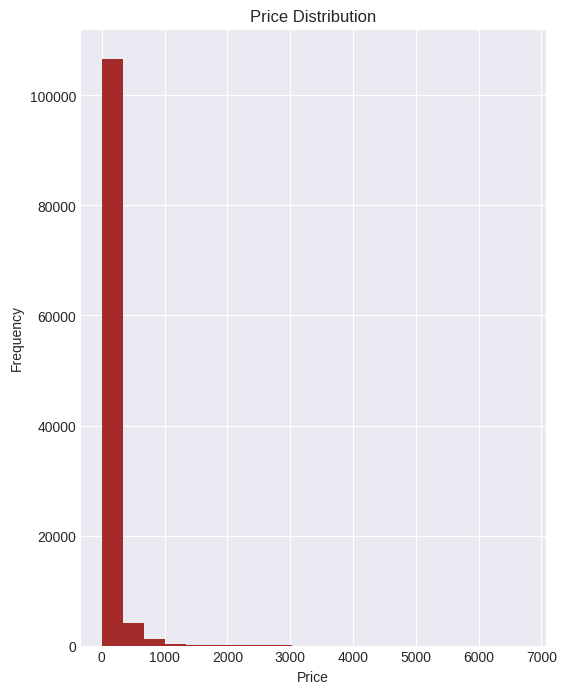

In [238]:
# Histogram to see the price distribution
plt.figure(figsize=(6, 8))
plt.hist(order_items_new["price"], bins=20, color = "brown")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

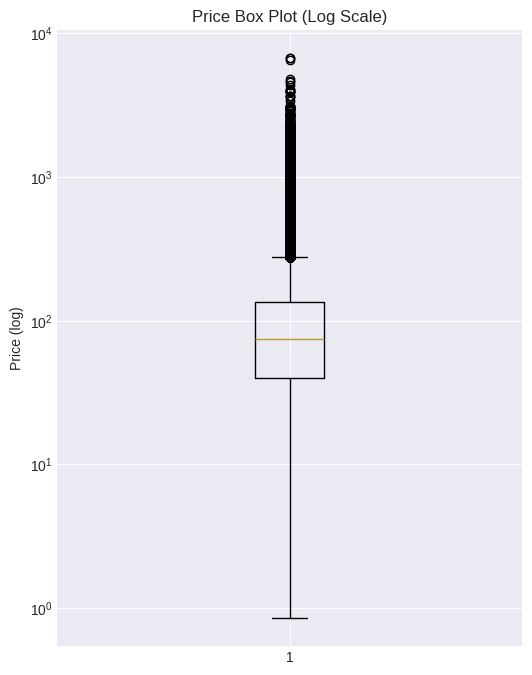

In [239]:
# Box plot for outliers
plt.figure(figsize=(6, 8))

plt.boxplot(order_items_new["price"])
plt.yscale("log")

plt.title("Price Box Plot (Log Scale)")
plt.ylabel("Price (log)")

plt.show()

In [240]:
# Looking for outliers manually
price = order_items_new["price"]

Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 39.9
Q3: 134.9
IQR: 95.0
Lower Bound: -102.6
Upper Bound: 277.4


In [241]:
outliers = order_items_new[(order_items_new['price'] < lower_bound) | (order_items_new['price'] > upper_bound)]
print(len(outliers))

8427


In [242]:
lower_outliers = price[price < lower_bound]
upper_outliers = price[price > upper_bound]

print("Lower Outliers:", len(lower_outliers))
print("Upper Outliers:", len(upper_outliers))


Lower Outliers: 0
Upper Outliers: 8427


In [243]:
percent_outliers = round((len(outliers) / len(price)) * 100,2)
print("Outlier Percentage:", percent_outliers, "%")

Outlier Percentage: 7.48 %


In [244]:
# Top 10 Highest Prices
order_items_new['price'].nlargest(10).reset_index(drop=True)

0    6735.00
1    6729.00
2    6499.00
3    4799.00
4    4690.00
5    4590.00
6    4399.87
7    4099.99
8    4059.00
9    3999.90
Name: price, dtype: float64

#### 1.5 Summary: Price Distribution & Outliers

- **Price range:** 0.85 to 6,735.00  
- **Median price:** 74.99 | **Mean price:** 120.65  
- **Distribution:** Strong right skew – most items are inexpensive, a small number are high‑value.  
- **Outliers (IQR method):**  
  - **Upper outliers:** 8,427 items (7.48% of total) – prices above 277.40  
  - **Lower outliers:** 0 items  

**Business decision:**  
All prices appear legitimate. Outliers represent genuine high‑value sales.  
Therefore, **no capping or removal will be applied** – all prices will be kept as‑is for revenue calculation.

## 1.6 Revenue Calculation & Monthly Trend (2017–2018)

In [245]:
# Filter Orders
delivered_orders = order_new[order_new['order_status'] == 'delivered']
print(delivered_orders.columns)
print("\n")
print(delivered_orders.head().reset_index(drop = True))

Index(['order_id', 'order_purchase_timestamp', 'order_status', 'year_month',
       'year', 'month'],
      dtype='object')


                           order_id order_purchase_timestamp order_status  \
0  bfbd0f9bdef84302105ad712db648a6c      2016-09-15 12:16:38    delivered   
1  3b697a20d9e427646d92567910af6d57      2016-10-03 09:44:50    delivered   
2  be5bc2f0da14d8071e2d45451ad119d9      2016-10-03 16:56:50    delivered   
3  a41c8759fbe7aab36ea07e038b2d4465      2016-10-03 21:13:36    delivered   
4  d207cc272675637bfed0062edffd0818      2016-10-03 22:06:03    delivered   

  year_month  year month  
0    2016-09  2016    09  
1    2016-10  2016    10  
2    2016-10  2016    10  
3    2016-10  2016    10  
4    2016-10  2016    10  


In [246]:
order_items_new.columns

Index(['order_id', 'price'], dtype='object')

In [247]:
# Merge the two tables : delivered_orders and order_items_new
merged_tables = pd.merge(delivered_orders, order_items_new, on = 'order_id', how = 'inner')
print(merged_tables.head().reset_index(drop=True))
print("\n")
print("The shape of the merged tables:", merged_tables.shape)

                           order_id order_purchase_timestamp order_status  \
0  bfbd0f9bdef84302105ad712db648a6c      2016-09-15 12:16:38    delivered   
1  bfbd0f9bdef84302105ad712db648a6c      2016-09-15 12:16:38    delivered   
2  bfbd0f9bdef84302105ad712db648a6c      2016-09-15 12:16:38    delivered   
3  3b697a20d9e427646d92567910af6d57      2016-10-03 09:44:50    delivered   
4  be5bc2f0da14d8071e2d45451ad119d9      2016-10-03 16:56:50    delivered   

  year_month  year month  price  
0    2016-09  2016    09  44.99  
1    2016-09  2016    09  44.99  
2    2016-09  2016    09  44.99  
3    2016-10  2016    10  29.90  
4    2016-10  2016    10  21.90  


The shape of the merged tables: (110197, 7)


In [248]:
# Renaming the col 'Price' to 'revenue'
merged_tables = merged_tables.rename(columns = {'price':'revenue'})
print(merged_tables.columns)

Index(['order_id', 'order_purchase_timestamp', 'order_status', 'year_month',
       'year', 'month', 'revenue'],
      dtype='object')


In [249]:
# Aggregate Monthly revenue
results = merged_tables.groupby('year_month', as_index = False)['revenue'].sum()
print(results)

   year_month    revenue
0     2016-09     134.97
1     2016-10   40325.11
2     2016-12      10.90
3     2017-01  111798.36
4     2017-02  234223.40
5     2017-03  359198.85
6     2017-04  340669.68
7     2017-05  489338.25
8     2017-06  421923.37
9     2017-07  481604.52
10    2017-08  554699.70
11    2017-09  607399.67
12    2017-10  648247.65
13    2017-11  987765.37
14    2017-12  726033.19
15    2018-01  924645.00
16    2018-02  826437.13
17    2018-03  953356.25
18    2018-04  973534.09
19    2018-05  977544.69
20    2018-06  856077.86
21    2018-07  867953.46
22    2018-08  838576.64


In [250]:
# Sort the results
results = results.sort_values('year_month')
print(results)

   year_month    revenue
0     2016-09     134.97
1     2016-10   40325.11
2     2016-12      10.90
3     2017-01  111798.36
4     2017-02  234223.40
5     2017-03  359198.85
6     2017-04  340669.68
7     2017-05  489338.25
8     2017-06  421923.37
9     2017-07  481604.52
10    2017-08  554699.70
11    2017-09  607399.67
12    2017-10  648247.65
13    2017-11  987765.37
14    2017-12  726033.19
15    2018-01  924645.00
16    2018-02  826437.13
17    2018-03  953356.25
18    2018-04  973534.09
19    2018-05  977544.69
20    2018-06  856077.86
21    2018-07  867953.46
22    2018-08  838576.64


**Note:** The dataset contains a small number of orders in late 2016 (Sept, Oct, Dec).  
These represent the platform's early launch phase and are excluded from the main trend analysis to avoid distortion.  
The core analysis covers **20 complete months from January 2017 to August 2018**.

In [251]:
# Filter to 2017–2018
monthly_revenue_2017_2018 = results[results['year_month'].str.startswith(('2017', '2018'))]
print(monthly_revenue_2017_2018.reset_index(drop=True))

   year_month    revenue
0     2017-01  111798.36
1     2017-02  234223.40
2     2017-03  359198.85
3     2017-04  340669.68
4     2017-05  489338.25
5     2017-06  421923.37
6     2017-07  481604.52
7     2017-08  554699.70
8     2017-09  607399.67
9     2017-10  648247.65
10    2017-11  987765.37
11    2017-12  726033.19
12    2018-01  924645.00
13    2018-02  826437.13
14    2018-03  953356.25
15    2018-04  973534.09
16    2018-05  977544.69
17    2018-06  856077.86
18    2018-07  867953.46
19    2018-08  838576.64


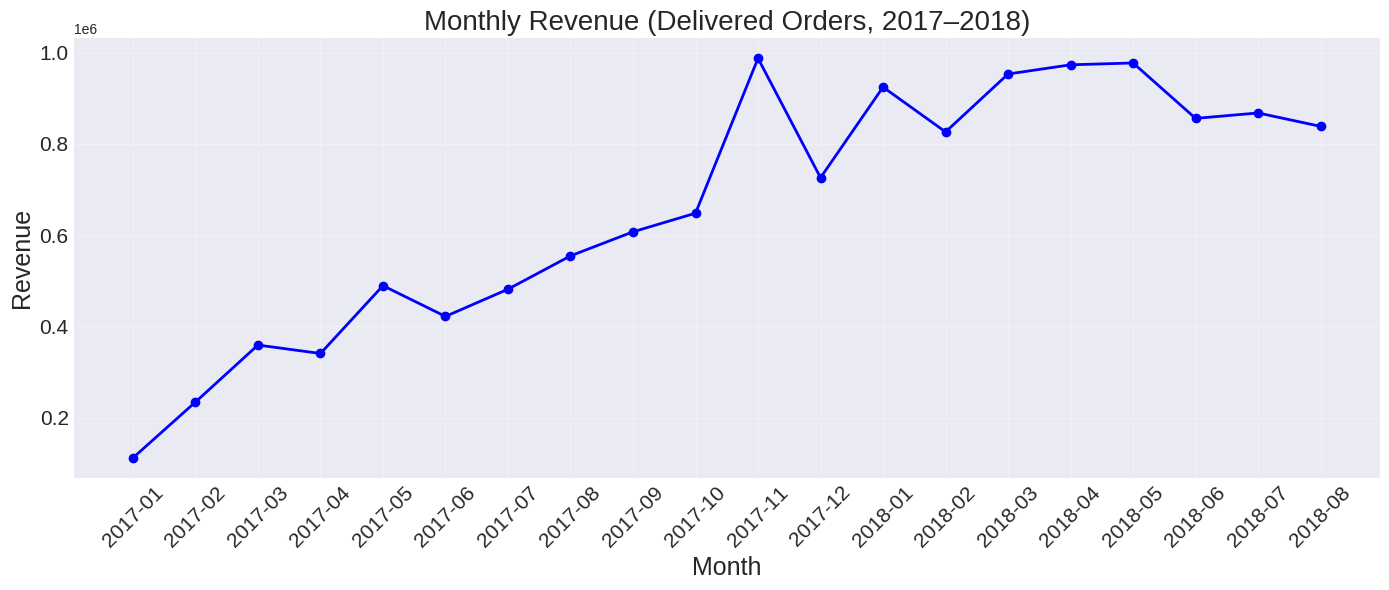

In [252]:
plt.figure(figsize=(14,6))
plt.plot(monthly_revenue_2017_2018['year_month'], monthly_revenue_2017_2018['revenue'], marker='o', linewidth=2, color='blue')
plt.title('Monthly Revenue (Delivered Orders, 2017–2018)', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 1.7 KPIs Analysis

In [253]:
# Total revenue
total_revenue = monthly_revenue_2017_2018['revenue'].sum()

# Best month
best_idx = monthly_revenue_2017_2018['revenue'].idxmax()
best_month = monthly_revenue_2017_2018.loc[best_idx, 'year_month']
best_revenue = monthly_revenue_2017_2018.loc[best_idx, 'revenue']

# Worst month (among these 20)
worst_idx = monthly_revenue_2017_2018['revenue'].idxmin()
worst_month = monthly_revenue_2017_2018.loc[worst_idx, 'year_month']
worst_revenue = monthly_revenue_2017_2018.loc[worst_idx, 'revenue']

print(f"Analysis period: Jan 2017 – Aug 2018 (20 months)")
print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Best month: {best_month} – ${best_revenue:,.2f}")
print(f"Worst full month: {worst_month} – ${worst_revenue:,.2f}")

Analysis period: Jan 2017 – Aug 2018 (20 months)
Total revenue: $13,181,027.13
Best month: 2017-11 – $987,765.37
Worst full month: 2017-01 – $111,798.36


#### 1.6 & 1.7 Summary: Revenue Performance & KPI Analysis (Jan 2017 – Aug 2018)

**Analysis scope:** 20 complete months of delivered orders, from **January 2017 to August 2018**.  
*Months before 2017 were excluded due to very low order volume (platform launch phase).  
September–October 2018 data is not available in the dataset*

| Metric | Value |
|--------|-------|
| **Total revenue** | 13,181,027.13 |
| **Best month** | November 2017 – 987,765.37 |
| **Worst full month** | January 2017 – 111,798.36 |

**Revenue trends:**
- Steady growth throughout 2017, with a **sharp peak in November 2017** – consistent with Black Friday promotions.
- December shows a noticeable dip, followed by a strong recovery in early 2018.
- Revenue remained consistently high from January to August 2018.

**Business insights & recommendations:**
1. **Black Friday drives massive revenue** – consider extending similar promotional campaigns to other months (e.g., mid‑year sales).
2. **The December dip warrants investigation** – is it seasonal, or were there specific operational issues?
3. **Strong 2018 performance** suggests successful customer retention; explore what changed after December 2017.
4. **Data limitation:** 2018 data ends in August; full‑year 2018 revenue would likely be even higher.

**Next step:** Proceed to **Question 2 – Customer Geographic Analysis** to understand where these customers are located.